# Research on datasets for Assignment B

## Garmin dataset

In [254]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
garmin_base_dir = "../files/Garmin_20241403"

## Files in the exported Garmin dataset

Seems like 
- DI-Connect-Aggregator contains daily health data
- DI-Connect-Wellness contains sleep data

In [255]:
!ls -R {garmin_base_dir} 


DI_CONNECT            IT_DEVICE_AND_CONTENT customer_data

../files/Garmin_20241403/DI_CONNECT:
DI-ATP                    DI-Connect-Routing        DI-Connect-Wellness
DI-Connect-Aggregator     DI-Connect-Social         DI-GOLF
DI-Connect-Fitness        DI-Connect-Uploaded-Files
DI-Connect-Metrics        DI-Connect-User

../files/Garmin_20241403/DI_CONNECT/DI-ATP:
Garmin_Coach_Pause_History.json

../files/Garmin_20241403/DI_CONNECT/DI-Connect-Aggregator:
HydrationLogFile_2020-05-14_2020-08-22.json
HydrationLogFile_2020-08-22_2020-11-30.json
HydrationLogFile_2020-11-30_2021-03-10.json
HydrationLogFile_2021-03-10_2021-06-18.json
HydrationLogFile_2021-06-18_2021-09-26.json
HydrationLogFile_2021-09-26_2022-01-04.json
HydrationLogFile_2022-01-04_2022-04-14.json
HydrationLogFile_2022-04-14_2022-07-23.json
HydrationLogFile_2022-07-23_2022-10-31.json
HydrationLogFile_2022-10-31_2023-02-08.json
HydrationLogFile_2023-02-08_2023-05-19.json
HydrationLogFile_2023-05-19_2023-08-27.json
HydrationLogF

python(78975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


### Outcommented python code to print a head of oll json-files below

...


<!-- %matplotlib inline
import pandas as pd
import os
import json
from IPython.display import display

# The corrected path
garmin_base_dir = "../files/Garmin_20241403"
di_connect_path = os.path.join(garmin_base_dir, "DI_CONNECT")  # Correcting the folder name

# Adjusting the function to account for JSON structures with multiple entries
def find_and_dance_json(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.json'):
                full_path = os.path.join(root, file)
                with open(full_path, 'r') as f:
                    data = json.load(f)
                
                # Checking if the JSON is a list of dictionaries
                if isinstance(data, list) and all(isinstance(item, dict) for item in data):
                    df = pd.DataFrame(data)
                elif isinstance(data, dict):
                    # For a single dictionary, we still convert it into a DataFrame
                    df = pd.DataFrame([data])
                else:
                    # If the structure is different, we might need to adjust the approach
                    print(f"Unexpected JSON structure in {file}")
                    continue
                
                # Displaying the DataFrame
                print(f"DataFrame for {os.path.basename(file)}:")
                display(df.head())

# Time for the adjusted dance!
find_and_dance_json(di_connect_path)
-->

### End of script

## Getting daily health data from DI-Connect-Aggregator


In [256]:
from IPython.display import display

pd.set_option('display.max_columns', None)

# The corrected path
garmin_base_dir = "../files/Garmin_20241403"
di_connect_path = os.path.join(garmin_base_dir, "DI_CONNECT", "DI-Connect-Aggregator")  # Correcting the folder name

# Adjusting the function to store each JSON as a separate DataFrame
def find_json(path):
    dfs = {}  # Dictionary to hold DataFrames
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.json') & file.startswith('UDS'):
                full_path = os.path.join(root, file)
                with open(full_path, 'r') as f:
                    data = json.load(f)

                # Checking if the JSON is a list of dictionaries
                if isinstance(data, list) and all(isinstance(item, dict) for item in data):
                    df = pd.DataFrame(data)
                elif isinstance(data, dict):
                    # For a single dictionary, we still convert it into a DataFrame
                    df = pd.DataFrame([data])
                else:
                    # If the structure is different, we might need to adjust the approach
                    print(f"Unexpected JSON structure in {file}")
                    continue

                # Storing the DataFrame in the dictionary with the filename as key
                dfs[file] = df

                # Displaying the DataFrame's first few rows
                print(f"DataFrame for {os.path.basename(file)} loaded.")
                #display(dfs[file].head())

    return dfs

dfs = find_json(di_connect_path)

len(dfs)

#dfs['UDSFile_2022-07-24_2022-11-01.json'].head()


#dfs['UDSFile_2022-07-24_2022-11-01.json'][['calendarDate', 'totalKilocalories', 'activeKilocalories', 'restingCaloriesFromActivity', 'totalSteps', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'userIntensityMinutesGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate','minAvgHeartRate','maxAvgHeartRate','allDayStress','bodyBattery']]
#dfs['UDSFile_2022-07-24_2022-11-01.json'].at[0,'allDayStress']
#dfs['UDSFile_2022-07-24_2022-11-01.json'].at[0,'bodyBattery']

DataFrame for UDSFile_2012-09-14_2012-12-23.json loaded.
DataFrame for UDSFile_2011-05-03_2011-08-11.json loaded.
DataFrame for UDSFile_2011-08-11_2011-11-19.json loaded.
DataFrame for UDSFile_2022-07-24_2022-11-01.json loaded.
DataFrame for UDSFile_2022-11-01_2023-02-09.json loaded.
DataFrame for UDSFile_2023-08-28_2023-12-06.json loaded.
DataFrame for UDSFile_2005-11-10_2006-02-18.json loaded.
DataFrame for UDSFile_2014-08-15_2014-11-23.json loaded.
DataFrame for UDSFile_2014-01-27_2014-05-07.json loaded.
DataFrame for UDSFile_2021-09-27_2022-01-05.json loaded.
DataFrame for UDSFile_2013-07-11_2013-10-19.json loaded.
DataFrame for UDSFile_2022-01-05_2022-04-15.json loaded.
DataFrame for UDSFile_2021-03-11_2021-06-19.json loaded.
DataFrame for UDSFile_2022-04-15_2022-07-24.json loaded.
DataFrame for UDSFile_2023-12-06_2024-03-15.json loaded.
DataFrame for UDSFile_2020-05-15_2020-08-23.json loaded.
DataFrame for UDSFile_2023-05-20_2023-08-28.json loaded.
DataFrame for UDSFile_2021-06-1

22

## 22 json files into one dataframe of health data + remove data from before 2020 (no watch)

In [257]:
# Setting up paths and configurations
garmin_base_dir = "../files/Garmin_20241403"
di_connect_path = os.path.join(garmin_base_dir, "DI_CONNECT", "DI-Connect-Aggregator")
columns_of_interest = ['calendarDate', 'totalKilocalories', 'activeKilocalories', 'restingCaloriesFromActivity', 
                       'totalSteps', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'userIntensityMinutesGoal', 
                       'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'minAvgHeartRate', 'maxAvgHeartRate',
                       'allDayStress', 'bodyBattery']

# Function to load JSONs and combine them into a filtered DataFrame
def load_and_filter_json(path, start_year=2020):
    all_dfs = []
    for root, _, files in os.walk(path):
        json_files = [f for f in sorted(files) if f.startswith('UDS') and f.endswith('.json')]
        for file in json_files:
            with open(os.path.join(root, file), 'r') as f:
                data = json.load(f)
            df = pd.DataFrame(data) if isinstance(data, list) else pd.DataFrame([data])
            all_dfs.append(df)

    # Combining and filtering the data
    if all_dfs:
        full_df = pd.concat(all_dfs, ignore_index=True)
        full_df['calendarDate'] = pd.to_datetime(full_df['calendarDate'])
        filtered_df = full_df.loc[full_df['calendarDate'].dt.year >= start_year, columns_of_interest]
        return filtered_df
    return pd.DataFrame()  # Return empty DataFrame if no data was loaded

# Apply the function and display the resulting DataFrame
focus_df = load_and_filter_json(di_connect_path)
focus_df.head()


calendarDate  totalKilocalories  activeKilocalories  \
14   2020-06-18             1923.0               446.0   
15   2020-06-19             1885.0               408.0   
16   2020-06-20             2456.0               975.0   
17   2020-06-21             2202.0               734.0   
18   2020-06-22             2017.0               549.0   

    restingCaloriesFromActivity  totalSteps  moderateIntensityMinutes  \
14                          NaN     13987.0                      11.0   
15                          NaN     12455.0                       2.0   
16                          NaN     26379.0                      20.0   
17                          NaN     12401.0                      52.0   
18                          NaN     15256.0                       5.0   

    vigorousIntensityMinutes  userIntensityMinutesGoal  minHeartRate  \
14                       0.0                     180.0          64.0   
15                      10.0                     180.0          55.0   
16                      88.0                     180.0          53.0   
17                       4.0                     180.0          50.0   
18                      43.0                     180.0          53.0   

    maxHeartRate  restingHeartRate  minAvgHeartRate  maxAvgHeartRate  \
14         128.0              68.0             65.0            121.0   
15         160.0              64.0             56.0            158.0   
16         159.0              62.0             54.0            156.0   
17         139.0              60.0             52.0            134.0   
18         152.0              60.0             54.0            149.0   

                                         allDayStress  \
14  {'userProfilePK': 86607424, 'calendarDate': '2...   
15  {'userProfilePK': 86607424, 'calendarDate': '2...   
16  {'userProfilePK': 86607424, 'calendarDate': '2...   
17  {'userProfilePK': 86607424, 'calendarDate': '2...   
18  {'userProfilePK': 86607424, 'calendarDate': '2...   

                                          bodyBattery  
14  {'userProfilePK': 86607424, 'calendarDate': '2...  
15  {'userProfilePK': 86607424, 'calendarDate': '2...  
16  {'userProfilePK': 86607424, 'calendarDate': '2...  
17  {'userProfilePK': 86607424, 'calendarDate': '2...  
18  {'userProfilePK': 86607424, 'calendarDate': '2...

### allDaysStress and bodyBattery are dictionaries inside each date:

In [258]:
focus_df[['allDayStress']].iat[0,0]['aggregatorList']
#focus_df[['bodyBattery']].iat[0,0]['bodyBatteryStatList']

[{'type': 'TOTAL',
  'averageStressLevel': 40,
  'averageStressLevelIntensity': 35,
  'maxStressLevel': 93,
  'stressIntensityCount': 376,
  'stressOffWristCount': 148,
  'stressTooActiveCount': 253,
  'totalStressCount': 777,
  'totalStressIntensity': -5086,
  'stressDuration': 15480,
  'restDuration': 7080,
  'activityDuration': 15180,
  'uncategorizedDuration': 8880,
  'totalDuration': 46620,
  'lowDuration': 7680,
  'mediumDuration': 7020,
  'highDuration': 780},
 {'type': 'AWAKE',
  'averageStressLevel': 40,
  'averageStressLevelIntensity': 35,
  'maxStressLevel': 93,
  'stressIntensityCount': 369,
  'stressOffWristCount': 119,
  'stressTooActiveCount': 253,
  'totalStressCount': 741,
  'totalStressIntensity': -5035,
  'stressDuration': 15120,
  'restDuration': 7020,
  'activityDuration': 15180,
  'uncategorizedDuration': 7140,
  'totalDuration': 44460,
  'lowDuration': 7320,
  'mediumDuration': 7020,
  'highDuration': 780},
 {'type': 'ASLEEP',
  'averageStressLevel': 31,
  'avera

## Getting the wellness sleep data from DI-Connect-Wellness

In [259]:
folder = "DI-Connect-Wellness"
di_connect_path = os.path.join(garmin_base_dir, "DI_CONNECT", folder)

# Function to load JSONs and combine them into a filtered DataFrame
def load_and_filter_json(path, start_year=2020):
    all_dfs = []
    for root, _, files in os.walk(path):
        json_files = [f for f in sorted(files) if f.endswith('sleepData.json')]
        for file in json_files:
            with open(os.path.join(root, file), 'r') as f:
                data = json.load(f)
            df = pd.DataFrame(data) if isinstance(data, list) else pd.DataFrame([data])
            all_dfs.append(df)

    # Combining and filtering the data
    if all_dfs:
        full_df = pd.concat(all_dfs, ignore_index=True)
        full_df['calendarDate'] = pd.to_datetime(full_df['calendarDate'])
        filtered_df = full_df.loc[full_df['calendarDate'].dt.year >= start_year]
        return filtered_df
    return pd.DataFrame()  # Return empty DataFrame if no data was loaded

# Apply the function and display the resulting DataFrame
sleep_df = load_and_filter_json(di_connect_path)
sleep_df


sleepStartTimestampGMT   sleepEndTimestampGMT calendarDate  \
0     2020-06-17T21:00:00.0  2020-06-18T04:00:00.0   2020-06-18   
1     2020-06-18T21:25:00.0  2020-06-19T03:46:00.0   2020-06-19   
2     2020-06-19T19:58:00.0  2020-06-20T04:14:00.0   2020-06-20   
3     2020-06-20T21:56:00.0  2020-06-21T04:52:00.0   2020-06-21   
4     2020-06-21T21:09:00.0  2020-06-22T04:55:00.0   2020-06-22   
...                     ...                    ...          ...   
1359  2024-03-09T22:12:00.0  2024-03-10T07:39:00.0   2024-03-10   
1360  2024-03-10T18:04:00.0  2024-03-11T04:45:00.0   2024-03-11   
1361  2024-03-11T20:14:00.0  2024-03-12T04:25:00.0   2024-03-12   
1362  2024-03-12T22:03:00.0  2024-03-13T02:10:00.0   2024-03-13   
1363  2024-03-13T20:15:00.0  2024-03-14T04:46:00.0   2024-03-14   

     sleepWindowConfirmationType  retro  deepSleepSeconds  lightSleepSeconds  \
0                    UNCONFIRMED  False               NaN                NaN   
1       ENHANCED_CONFIRMED_FINAL  False            2880.0            15600.0   
2       ENHANCED_CONFIRMED_FINAL  False            3660.0            16020.0   
3       ENHANCED_CONFIRMED_FINAL  False            3120.0            15180.0   
4       ENHANCED_CONFIRMED_FINAL  False            3120.0            17400.0   
...                          ...    ...               ...                ...   
1359    ENHANCED_CONFIRMED_FINAL  False            9780.0            18060.0   
1360    ENHANCED_CONFIRMED_FINAL  False            4560.0            22500.0   
1361    ENHANCED_CONFIRMED_FINAL  False            2580.0            17880.0   
1362          ENHANCED_CONFIRMED  False            5220.0             4680.0   
1363          ENHANCED_CONFIRMED  False            3000.0            18420.0   

      remSleepSeconds  awakeSleepSeconds  unmeasurableSeconds  \
0                 NaN                NaN                  NaN   
1              3720.0              660.0                  0.0   
2              8100.0              840.0               1140.0   
3              5640.0             1020.0                  0.0   
4              7320.0              120.0                  0.0   
...               ...                ...                  ...   
1359           5880.0              300.0                  0.0   
1360           9420.0             1980.0                  0.0   
1361           8160.0              840.0                  0.0   
1362           2760.0              240.0               1920.0   
1363           8100.0             1140.0                  0.0   

      averageRespiration  lowestRespiration  highestRespiration  \
0                    NaN                NaN                 NaN   
1                   16.0                6.0                19.0   
2                   16.0                7.0                21.0   
3                   15.0                7.0                18.0   
4                   16.0                6.0                21.0   
...                  ...                ...                 ...   
1359                16.0               12.0                21.0   
1360                16.0               12.0                21.0   
1361                16.0               12.0                22.0   
1362                16.0               12.0                19.0   
1363                15.0               11.0                20.0   

                                       spo2SleepSummary  
0                                                   NaN  
1                                                   NaN  
2     {'userProfilePk': 86607424, 'deviceId': 333492...  
3     {'userProfilePk': 86607424, 'deviceId': 333492...  
4     {'userProfilePk': 86607424, 'deviceId': 333492...  
...                                                 ...  
1359                                                NaN  
1360                                                NaN  
1361                                                NaN  
1362                                                NaN  
1363           

In [260]:
sleep_df[['spo2SleepSummary']].iat[2,0]

{'userProfilePk': 86607424,
 'deviceId': 3334929524,
 'sleepMeasurementStartGMT': '2020-06-19T20:52:00.0',
 'sleepMeasurementEndGMT': '2020-06-20T04:00:00.0',
 'alertThresholdValue': 0,
 'averageSPO2': 93.0,
 'averageHR': 60.0,
 'lowestSPO2': 84}

In [261]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
import pandas as pd

# Ensure the output is in the notebook
output_notebook()

# Convert 'calendarDate' to datetime if it's not already
sleep_df['calendarDate'] = pd.to_datetime(sleep_df['calendarDate'])

# Prepare the data source
source = ColumnDataSource(data={
    'date': sleep_df['calendarDate'],
    'deep': sleep_df['deepSleepSeconds'] / 3600,  # Convert seconds to hours
    'light': sleep_df['lightSleepSeconds'] / 3600,
    'rem': sleep_df['remSleepSeconds'] / 3600
})

# Create a new plot with a title and axis labels
p = figure(title="Sleep Data Over Time", x_axis_label='Date', y_axis_label='Hours of Sleep', x_axis_type='datetime',
          width=900, height=600)

# Add lines to the plot
p.line(x='date', y='deep', line_width=2, color='red', legend_label='Deep Sleep', source=source)
p.line(x='date', y='light', line_width=2, color='green', legend_label='Light Sleep', source=source)
p.line(x='date', y='rem', line_width=2, color='blue', legend_label='REM Sleep', source=source)

# Add hover tool
hover = HoverTool()
hover.tooltips=[
    ('Date', '@date{%F}'),
    ('Deep Sleep', '@deep hours'),
    ('Light Sleep', '@light hours'),
    ('REM Sleep', '@rem hours')
]
hover.formatters={'@date': 'datetime'}
p.add_tools(hover)

# Show the result
show(p)


Loading BokehJS ...

In [262]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, DateSlider, CustomJS
from bokeh.layouts import column
from bokeh.models import DatetimeTicker, DatetimeTickFormatter
from bokeh.models import Range1d

output_notebook()


# Calculate the start and end of the latest month
# sleep_df contains all sleep data exported
max_date = sleep_df['calendarDate'].max()
latest_month_start = pd.Timestamp(year=max_date.year, month=max_date.month, day=1)
latest_month_end = latest_month_start + pd.DateOffset(months=1) - pd.DateOffset(days=1)

# Filter the DataFrame to the latest month
latest_month_data = sleep_df[(sleep_df['calendarDate'] >= latest_month_start) & (sleep_df['calendarDate'] <= latest_month_end)]


# Ensure datetime format
sleep_df['calendarDate'] = pd.to_datetime(sleep_df['calendarDate'])
sleep_df['sleepStartTimestampGMT'] = pd.to_datetime(sleep_df['sleepStartTimestampGMT'])
sleep_df['sleepEndTimestampGMT'] = pd.to_datetime(sleep_df['sleepEndTimestampGMT'])

# Calculate total sleep duration in hours
sleep_df['totalSleepHours'] = (sleep_df['sleepEndTimestampGMT'] - sleep_df['sleepStartTimestampGMT']).dt.total_seconds() / 3600

# Data source setup
all_data = {
    'date': sleep_df['calendarDate'],
    'deep': sleep_df['deepSleepSeconds'] / 3600,
    'light': sleep_df['lightSleepSeconds'] / 3600,
    'rem': sleep_df['remSleepSeconds'] / 3600,
    'total': sleep_df['totalSleepHours']
}
source = ColumnDataSource(data=all_data)

# Original complete data source for resetting or adjusting data
original_source = ColumnDataSource(data=source.data.copy())

# Initially filter source to show only the latest month
source.data = {
    key: [value[i] for i in range(len(all_data['date'])) if latest_month_start <= all_data['date'][i] <= latest_month_end]
    for key, value in all_data.items()
}


# Create the plot with an explicit x-axis range
#p = figure(title="Sleep Data Over Time", x_axis_label='Date', y_axis_label='Hours of Sleep',
#           x_axis_type='datetime', width=900, height=600,
#           x_range=Range1d(latest_month_start, latest_month_end))

# Create the plot with an initial x-axis range
p = figure(title="Sleep Data Over Time", x_axis_label='Date', y_axis_label='Hours of Sleep',
           x_axis_type='datetime', width=900, height=600)
#        x_range=Range1d(latest_month_start, latest_month_end))


# Create bar plots for each sleep stage
p.vbar(x='date', top='deep', width=pd.Timedelta(days=1), color='red', alpha=0.4, legend_label='Deep Sleep', source=source)
p.vbar(x='date', top='light', width=pd.Timedelta(days=1), color='green', alpha=0.4, legend_label='Light Sleep', source=source)
p.vbar(x='date', top='rem', width=pd.Timedelta(days=1), color='blue', alpha=0.4, legend_label='REM Sleep', source=source)
p.line('date', 'total', line_width=2, color='grey', legend_label='Total Sleep', source=source, alpha=0.9)


# Configure legend properties
p.legend.location = "top_right"  # Specify location within the plot area
p.legend.orientation = "vertical"

# To place the legend outside the plot, adjust the figure's properties
p.add_layout(p.legend[0], 'right')  # This moves the legend to the right of the plot

# Configure legend to be interactive
p.legend.click_policy = "hide"  # Or use "mute" if you prefer to dim the unselected items

# Configure Hover Tool
hover = HoverTool(tooltips=[
    ('Date', '@date{%F}'),
    ('Deep Sleep', '@deep hours'),
    ('Light Sleep', '@light hours'),
    ('REM Sleep', '@rem hours')
], formatters={'@date': 'datetime'})
p.add_tools(hover)


# Setup DateSlider
max_date = sleep_df['calendarDate'].max()
latest_month_start = pd.Timestamp(year=max_date.year, month=max_date.month, day=1)
latest_month_end = pd.Timestamp(year=max_date.year, month=max_date.month + 1, day=1) - pd.Timedelta(days=1)


date_slider = DateSlider(start=sleep_df['calendarDate'].min().replace(day=1),
                         end=sleep_df['calendarDate'].max().replace(day=1),
                         value=latest_month_start,
                         step=1, title="Select Month")


callback = CustomJS(args=dict(source=source, original_source=original_source, slider=date_slider), code="""
    const data = source.data;
    const original_data = original_source.data;
    const dates = original_data['date'];
    const chosen_date = new Date(slider.value);
    chosen_date.setHours(0, 0, 0, 0); // Normalize date for comparison

    const start = new Date(chosen_date.getFullYear(), chosen_date.getMonth(), 1);
    const end = new Date(chosen_date.getFullYear(), chosen_date.getMonth() + 1, 0, 23, 59, 59); // Last moment of the month

    data['date'] = [];
    data['deep'] = [];
    data['light'] = [];
    data['rem'] = [];
    data['total'] = [];

    for (let i = 0; i < dates.length; i++) {
        if (dates[i] >= start && dates[i] <= end) {
            data['date'].push(dates[i]);
            data['deep'].push(original_data['deep'][i]);
            data['light'].push(original_data['light'][i]);
            data['rem'].push(original_data['rem'][i]);
            data['total'].push(original_data['total'][i]);
        }
    }
    source.change.emit();
""")

date_slider.js_on_change('value', callback)


p.xaxis[0].ticker = DatetimeTicker(desired_num_ticks=5)  # Adjust to how many ticks you want visible
p.xaxis[0].formatter = DatetimeTickFormatter(days="%d/%m")
    
# Show the layout
show(column(p, date_slider))

Loading BokehJS ...

### Testing with stacked sleep ... why is total sleep often less than deep + light + REM?

In [263]:
# Add cumulative sum fields for stacking
sleep_df['cumulative_deep'] = sleep_df['deepSleepSeconds'] / 3600  # Convert seconds to hours, same as 'deep'
sleep_df['cumulative_light'] = (sleep_df['deepSleepSeconds'] + sleep_df['lightSleepSeconds']) / 3600
sleep_df['cumulative_rem'] = (sleep_df['deepSleepSeconds'] + sleep_df['lightSleepSeconds'] + sleep_df['remSleepSeconds']) / 3600


# Data source setup
all_data = {
    'date': sleep_df['calendarDate'],
    'deep': sleep_df['deepSleepSeconds'] / 3600,
    'light': sleep_df['lightSleepSeconds'] / 3600,
    'rem': sleep_df['remSleepSeconds'] / 3600,
    'total': sleep_df['totalSleepHours'],
    'cumulative_deep': sleep_df['cumulative_deep'],
    'cumulative_light': sleep_df['cumulative_light'],
    'cumulative_rem': sleep_df['cumulative_rem']
}
source = ColumnDataSource(data=all_data)

# Original complete data source for resetting or adjusting data
original_source = ColumnDataSource(data=source.data.copy())

# Initially filter source to show only the latest month
source.data = {
    key: [value[i] for i in range(len(all_data['date'])) if latest_month_start <= all_data['date'][i] <= latest_month_end]
    for key, value in all_data.items()
}


# Create the plot with an initial x-axis range
p = figure(title="Sleep Data Over Time", x_axis_label='Date', y_axis_label='Hours of Sleep',
           x_axis_type='datetime', width=900, height=600)
#        x_range=Range1d(latest_month_start, latest_month_end))


# Create bar plots for each sleep stage - stack the plot
p.vbar(x='date', top='cumulative_deep', width=pd.Timedelta(days=1), color='red', alpha=0.4, legend_label='Deep Sleep', source=source)
p.vbar(x='date', top='cumulative_light', width=pd.Timedelta(days=1), color='green', alpha=0.4, legend_label='Light Sleep', source=source, bottom='cumulative_deep')
p.vbar(x='date', top='cumulative_rem', width=pd.Timedelta(days=1), color='blue', alpha=0.4, legend_label='REM Sleep', source=source, bottom='cumulative_light')
p.line('date', 'total', line_width=2, color='grey', legend_label='Total Sleep', source=source, alpha=0.9)


# Configure legend properties
p.legend.location = "top_left"  # Specifying above, though this is not a standard location keyword
p.legend.orientation = "horizontal"

# To place the legend above the plot properly, adjust using add_layout
p.add_layout(p.legend[0], 'above')  # This moves the legend above the plot

# Configure legend to be interactive
p.legend.click_policy = "hide"  # Or use "mute" if you prefer to dim the unselected items

# Configure Hover Tool
hover = HoverTool(tooltips=[
    ('Date', '@date{%F}'),
    ('Deep Sleep', '@deep hours'),
    ('Light Sleep', '@light hours'),
    ('REM Sleep', '@rem hours')
], formatters={'@date': 'datetime'})
p.add_tools(hover)


# Setup DateSlider
max_date = sleep_df['calendarDate'].max()
latest_month_start = pd.Timestamp(year=max_date.year, month=max_date.month, day=1)
latest_month_end = pd.Timestamp(year=max_date.year, month=max_date.month + 1, day=1) - pd.Timedelta(days=1)


date_slider = DateSlider(start=sleep_df['calendarDate'].min().replace(day=1),
                         end=sleep_df['calendarDate'].max().replace(day=1),
                         value=latest_month_start,
                         step=1, title="Select Month")


callback = CustomJS(args=dict(source=source, original_source=original_source, slider=date_slider), code="""
    const data = source.data;
    const original_data = original_source.data;
    const dates = original_data['date'];
    const chosen_date = new Date(slider.value);
    chosen_date.setHours(0, 0, 0, 0); // Normalize date for comparison

    const start = new Date(chosen_date.getFullYear(), chosen_date.getMonth(), 1);
    const end = new Date(chosen_date.getFullYear(), chosen_date.getMonth() + 1, 0, 23, 59, 59); // Last moment of the month

    data['date'] = [];
    data['deep'] = [];
    data['light'] = [];
    data['rem'] = [];
    data['total'] = [];

    for (let i = 0; i < dates.length; i++) {
        if (dates[i] >= start && dates[i] <= end) {
            data['date'].push(dates[i]);
            data['deep'].push(original_data['deep'][i]);
            data['light'].push(original_data['light'][i]);
            data['rem'].push(original_data['rem'][i]);
            data['total'].push(original_data['total'][i]);
        }
    }
    source.change.emit();
""")

date_slider.js_on_change('value', callback)


p.xaxis[0].ticker = DatetimeTicker(desired_num_ticks=5)  # Adjust to how many ticks you want visible
p.xaxis[0].formatter = DatetimeTickFormatter(days="%d/%m")

    
# Show the layout
show(column(p, date_slider))


## Show stress levels

In [264]:
focus_df.head()

calendarDate  totalKilocalories  activeKilocalories  \
14   2020-06-18             1923.0               446.0   
15   2020-06-19             1885.0               408.0   
16   2020-06-20             2456.0               975.0   
17   2020-06-21             2202.0               734.0   
18   2020-06-22             2017.0               549.0   

    restingCaloriesFromActivity  totalSteps  moderateIntensityMinutes  \
14                          NaN     13987.0                      11.0   
15                          NaN     12455.0                       2.0   
16                          NaN     26379.0                      20.0   
17                          NaN     12401.0                      52.0   
18                          NaN     15256.0                       5.0   

    vigorousIntensityMinutes  userIntensityMinutesGoal  minHeartRate  \
14                       0.0                     180.0          64.0   
15                      10.0                     180.0          55.0   
16                      88.0                     180.0          53.0   
17                       4.0                     180.0          50.0   
18                      43.0                     180.0          53.0   

    maxHeartRate  restingHeartRate  minAvgHeartRate  maxAvgHeartRate  \
14         128.0              68.0             65.0            121.0   
15         160.0              64.0             56.0            158.0   
16         159.0              62.0             54.0            156.0   
17         139.0              60.0             52.0            134.0   
18         152.0              60.0             54.0            149.0   

                                         allDayStress  \
14  {'userProfilePK': 86607424, 'calendarDate': '2...   
15  {'userProfilePK': 86607424, 'calendarDate': '2...   
16  {'userProfilePK': 86607424, 'calendarDate': '2...   
17  {'userProfilePK': 86607424, 'calendarDate': '2...   
18  {'userProfilePK': 86607424, 'calendarDate': '2...   

                                          bodyBattery  
14  {'userProfilePK': 86607424, 'calendarDate': '2...  
15  {'userProfilePK': 86607424, 'calendarDate': '2...  
16  {'userProfilePK': 86607424, 'calendarDate': '2...  
17  {'userProfilePK': 86607424, 'calendarDate': '2...  
18  {'userProfilePK': 86607424, 'calendarDate': '2...

In [265]:
def extract_stress_data(row):
    if isinstance(row, list) and row:  # Check if it's a list and not empty
        first_dict = row[0]  # Assuming you want the first dictionary
        return pd.Series({
            'AverageStressLevel': first_dict.get('averageStressLevel', None),
            'MaxStressLevel': first_dict.get('maxStressLevel', None)
        })
    else:
        return pd.Series({'AverageStressLevel': None, 'MaxStressLevel': None})


In [266]:
focus_df[['allDayStress']].iat[0,0]

{'userProfilePK': 86607424,
 'calendarDate': '2020-06-18',
 'aggregatorList': [{'type': 'TOTAL',
   'averageStressLevel': 40,
   'averageStressLevelIntensity': 35,
   'maxStressLevel': 93,
   'stressIntensityCount': 376,
   'stressOffWristCount': 148,
   'stressTooActiveCount': 253,
   'totalStressCount': 777,
   'totalStressIntensity': -5086,
   'stressDuration': 15480,
   'restDuration': 7080,
   'activityDuration': 15180,
   'uncategorizedDuration': 8880,
   'totalDuration': 46620,
   'lowDuration': 7680,
   'mediumDuration': 7020,
   'highDuration': 780},
  {'type': 'AWAKE',
   'averageStressLevel': 40,
   'averageStressLevelIntensity': 35,
   'maxStressLevel': 93,
   'stressIntensityCount': 369,
   'stressOffWristCount': 119,
   'stressTooActiveCount': 253,
   'totalStressCount': 741,
   'totalStressIntensity': -5035,
   'stressDuration': 15120,
   'restDuration': 7020,
   'activityDuration': 15180,
   'uncategorizedDuration': 7140,
   'totalDuration': 44460,
   'lowDuration': 732

In [267]:
import pandas as pd

def extract_stress_data(row):
    # Accessing the list of stress data segments
    aggregator_list = row.get('aggregatorList', [])
    
    # Find the dictionary in the list where 'type' is 'TOTAL'
    total_stress_data = next((item for item in aggregator_list if item['type'] == 'TOTAL'), None)
    
    # If found, extract the required data
    if total_stress_data:
        return pd.Series({
            'AverageStressLevel': total_stress_data.get('averageStressLevel', None),
            'MaxStressLevel': total_stress_data.get('maxStressLevel', None)
        })
    else:
        return pd.Series({'AverageStressLevel': None, 'MaxStressLevel': None})

# Apply the function to each row in the 'allDayStress' column
stress_metrics = focus_df['allDayStress'].apply(extract_stress_data)
focus_df = pd.concat([focus_df, stress_metrics], axis=1)


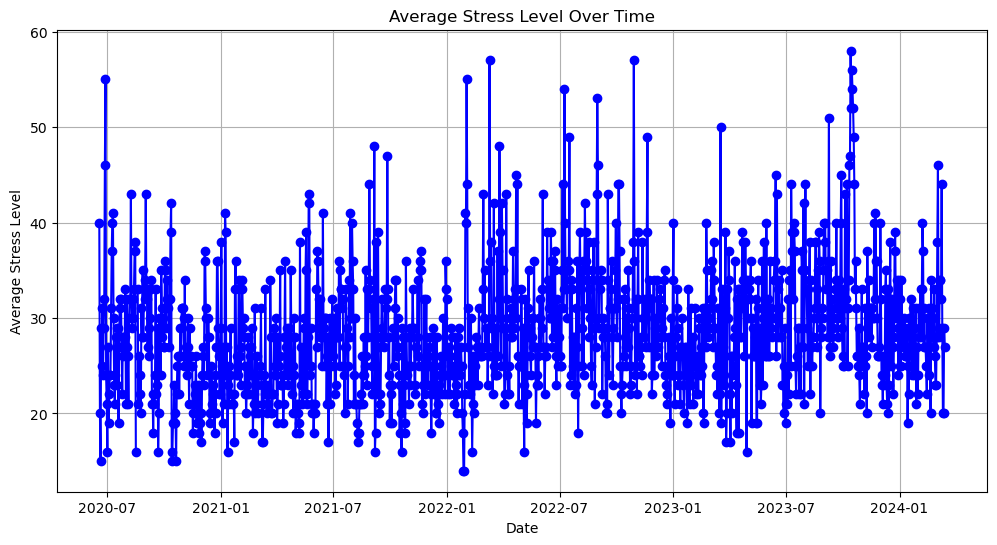

In [268]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(focus_df['calendarDate'], focus_df['AverageStressLevel'], marker='o', linestyle='-', color='b')
plt.title('Average Stress Level Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stress Level')
plt.grid(True)
plt.show()


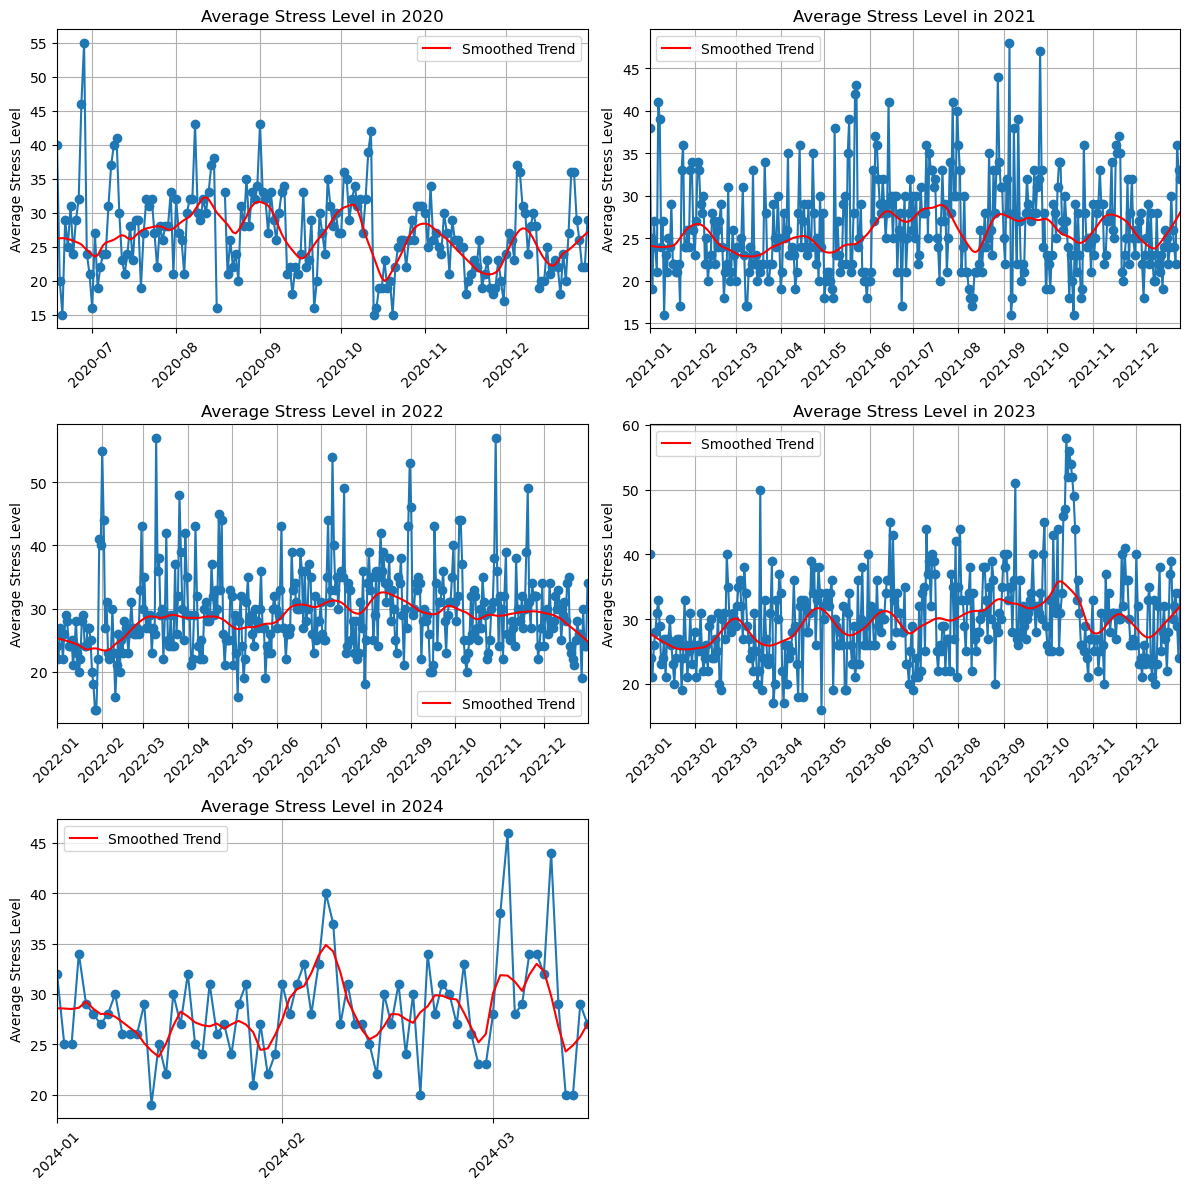

In [269]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates  # Import the dates module from matplotlib

# Assuming 'calendarDate' and 'AverageStressLevel' are in your DataFrame
focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])  # Ensure this column is datetime if not already
focus_df['year'] = focus_df['calendarDate'].dt.year  # Extract year from date for grouping

# Prepare subplots
years = focus_df['year'].unique()
years.sort()
rows = (len(years) + 1) // 2
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 4 * rows))
axes = axes.ravel()

# Plot each year's data
for i, year in enumerate(years):
    ax = axes[i]
    year_data = focus_df[focus_df['year'] == year]
    
    # Plot raw data as a line plot
    ax.plot(year_data['calendarDate'], year_data['AverageStressLevel'], marker='o', linestyle='-')
    
    # Ensure that the calendarDate is converted to numeric for lowess smoothing
    numeric_dates = mdates.date2num(year_data['calendarDate'])  # Convert dates to numeric format using matplotlib.dates
    
    # Lowess smoothing
    smoothed = lowess(year_data['AverageStressLevel'], numeric_dates, frac=0.1)
    ax.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], 'r-', label='Smoothed Trend')
    
    ax.set_title(f"Average Stress Level in {year}")
    ax.set_ylabel('Average Stress Level')
    ax.grid(True)

    ax.set_xlim([year_data['calendarDate'].min(), year_data['calendarDate'].max()])

    # Set x-axis major locator to month starts and formatter to year-month format
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.setp(ax.get_xticklabels(), rotation=45)
    
    ax.legend()

# Hide any unused subplot axes if the number of plots is odd
if len(years) % 2 != 0:
    axes[-1].axis('off')
    
plt.tight_layout()
plt.show()


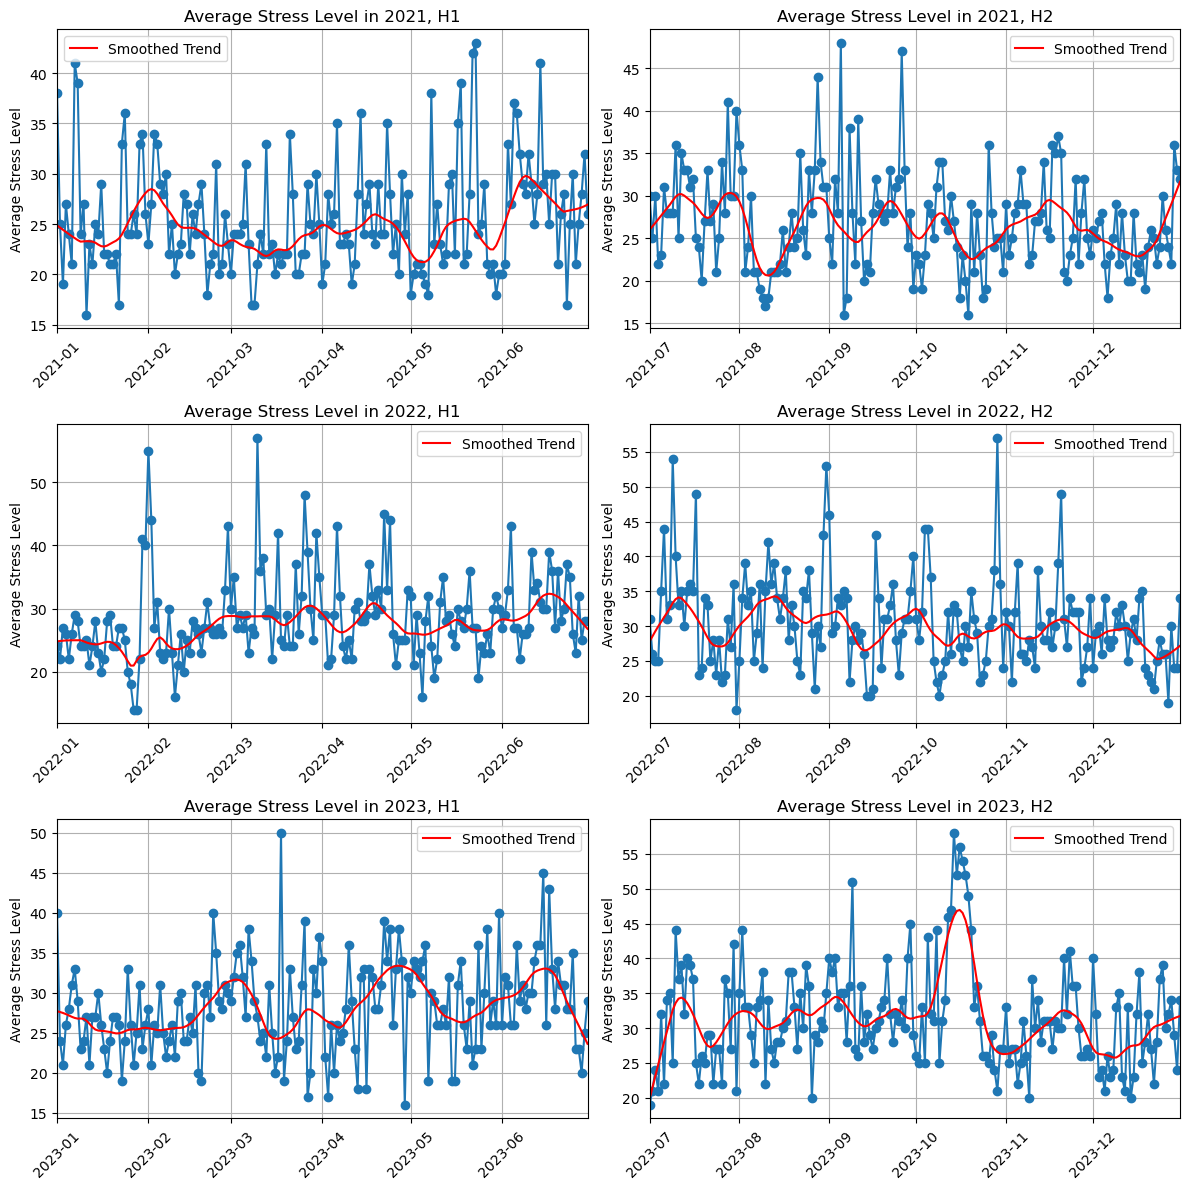

In [270]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates

# Assuming 'calendarDate' and 'AverageStressLevel' are in your DataFrame
focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])  # Ensure this column is datetime if not already

#only the years of 2021-2023
focus_df = focus_df[focus_df['calendarDate'] >= '2021-01-01']  
focus_df = focus_df[focus_df['calendarDate'] <= '2023-12-31']  

focus_df['year'] = focus_df['calendarDate'].dt.year  # Extract year from date for grouping
focus_df['half'] = (focus_df['calendarDate'].dt.month - 1) // 6 + 1  # Determine the half of the year

# Prepare subplots
years = focus_df['year'].unique()
years.sort()
halfs = [1, 2]  # Two halves in a year
fig, axes = plt.subplots(nrows=len(years), ncols=2, figsize=(12, 4 * len(years)))  # One row per year, two columns for each half
axes = axes.ravel()

plot_index = 0
for year in years:
    for half in halfs:
        ax = axes[plot_index]
        half_data = focus_df[(focus_df['year'] == year) & (focus_df['half'] == half)]

        if half_data.empty:
            ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_title(f"No Data in {year}, H{half}")
            ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31')])
        else:
            # Plot raw data as a line plot
            ax.plot(half_data['calendarDate'], half_data['AverageStressLevel'], marker='o', linestyle='-')
            
            # Ensure that the calendarDate is converted to numeric for lowess smoothing
            numeric_dates = mdates.date2num(half_data['calendarDate'])
            
            # Lowess smoothing
            smoothed = lowess(half_data['AverageStressLevel'], numeric_dates, frac=0.1)
            ax.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], 'r-', label='Smoothed Trend')
            
            ax.set_title(f"Average Stress Level in {year}, H{half}")
            ax.set_ylabel('Average Stress Level')
            ax.grid(True)
            
            # Set x-axis major locator to month starts and formatter to year-month format
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            
            # Set x-axis limits based on the half
            if half == 1:
                ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-06-30')])
            else:
                ax.set_xlim([pd.Timestamp(f'{year}-07-01'), pd.Timestamp(f'{year}-12-31')])

            # Rotate date labels
            plt.setp(ax.get_xticklabels(), rotation=45)

            ax.legend()
        
        plot_index += 1

plt.tight_layout()
plt.show()


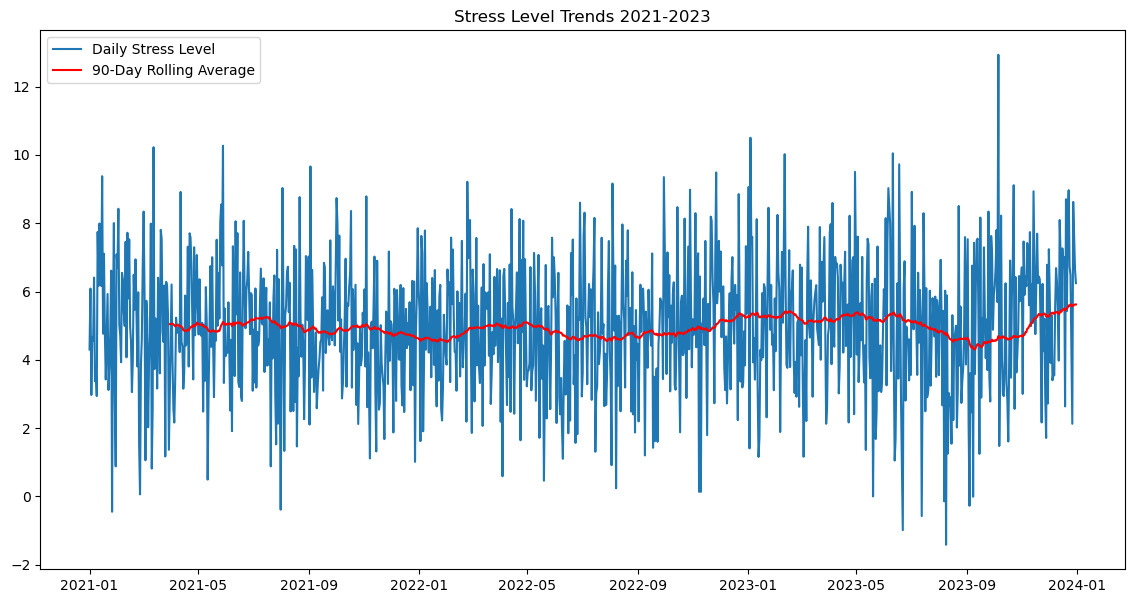

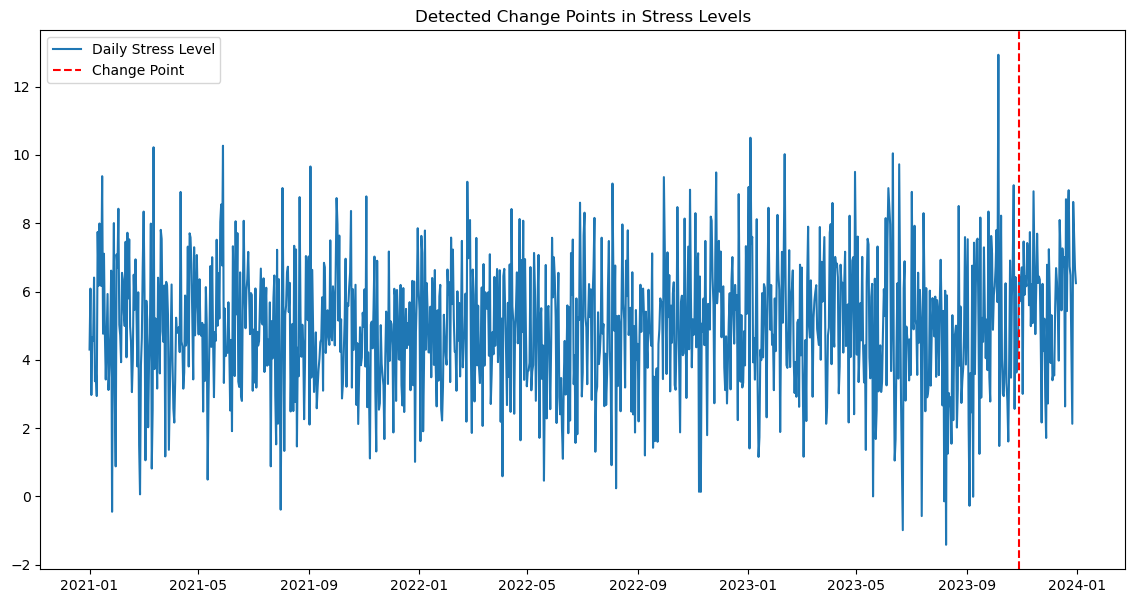

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt  # Correct import for the ruptures package

# Sample DataFrame setup
data = {
    'Date': pd.date_range(start="2021-01-01", periods=1095, freq='D'),
    'StressLevel': np.random.normal(loc=5, scale=2, size=1095)  # Simulated stress levels
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Calculate a 30-day rolling average
df['RollingMean'] = df['StressLevel'].rolling(window=90).mean()

# Plotting the stress levels and the rolling average
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['StressLevel'], label='Daily Stress Level')
plt.plot(df.index, df['RollingMean'], label='90-Day Rolling Average', color='red')
plt.title('Stress Level Trends 2021-2023')
plt.legend()
plt.show()

# Change point detection using ruptures
model = "l1"  # Using L1 norm
penalty = 8
algo = rpt.Pelt(model=model, min_size=1, jump=1).fit(df['StressLevel'].values)
change_points = algo.predict(pen=penalty)

# Filter out change point that exceeds the length of the DataFrame
change_points = [cp for cp in change_points if cp < len(df)]

# Highlighting change points on the plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['StressLevel'], label='Daily Stress Level')
for cp in change_points:
    plt.axvline(df.index[cp], color='r', linestyle='--', label='Change Point' if cp == change_points[0] else None)
plt.title('Detected Change Points in Stress Levels')
plt.legend()
plt.show()


In [272]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Slider, CustomJS
from bokeh.layouts import column

output_notebook()

# Prepare data
focus_df['year'] = focus_df['calendarDate'].dt.year
source = ColumnDataSource(focus_df)

# Setup plot
p = figure(x_axis_type="datetime", title="Average Stress Level Over Time", width=800, height=400,
           tools="pan,wheel_zoom,box_zoom,reset")
p.line('calendarDate', 'AverageStressLevel', source=source, line_width=2, color='navy')

# Slider to change year
slider = Slider(start=focus_df['year'].min(), end=focus_df['year'].max(), value=focus_df['year'].min(), step=1, title="Year")

# JavaScript to filter data based on slider
callback = CustomJS(args=dict(source=source, slider=slider), code="""
    var data = source.data;
    var year = slider.value;
    var calendarDate = data['calendarDate'];
    var averageStressLevel = data['AverageStressLevel'];
    var new_calendarDate = [];
    var new_averageStressLevel = [];
    for (var i = 0; i < calendarDate.length; i++) {
        if (new Date(calendarDate[i]).getFullYear() == year) {
            new_calendarDate.push(calendarDate[i]);
            new_averageStressLevel.push(averageStressLevel[i]);
        }
    }
    data['calendarDate'] = new_calendarDate;
    data['AverageStressLevel'] = new_averageStressLevel;
    source.change.emit();
""")

slider.js_on_change('value', callback)

# Layout and show plot
layout = column(p, slider)
show(layout)


Loading BokehJS ...

## Checking the menstruation cycles from DI-Connect-Wellness as well 

In [41]:
folder = "DI-Connect-Wellness"
di_connect_path = os.path.join(garmin_base_dir, "DI_CONNECT", folder)

# Function to load JSONs and combine them into a filtered DataFrame
def load_and_filter_json(path, start_year=2020):
    all_dfs = []
    for root, _, files in os.walk(path):
        json_files = [f for f in sorted(files) if f.endswith('Cycles.json')]
        for file in json_files:
            with open(os.path.join(root, file), 'r') as f:
                data = json.load(f)
            df = pd.DataFrame(data) if isinstance(data, list) else pd.DataFrame([data])
            all_dfs.append(df)

    # Combining and filtering the data
    if all_dfs:
        full_df = pd.concat(all_dfs, ignore_index=True)
        return full_df
    return pd.DataFrame()  # Return empty DataFrame if no data was loaded

# Apply the function and display the resulting DataFrame
mens_df = load_and_filter_json(di_connect_path)
mens_df


userProfilePk   startDate  predictedPeriodLength  actualPeriodLength  \
0        86607424  2020-06-28                      4                   4   
1        86607424  2020-07-25                      4                   4   
2        86607424  2020-08-20                      4                   4   
3        86607424  2020-09-16                      5                   5   
4        86607424  2020-10-13                      4                   4   
5        86607424  2020-11-07                      4                   4   
6        86607424  2020-11-26                      3                   3   
7        86607424  2020-12-23                      4                   4   
8        86607424  2021-01-18                      4                   4   
9        86607424  2021-02-12                      5                   4   
10       86607424  2021-03-09                      4                   4   
11       86607424  2021-04-05                      4                   4   
12       86607424  2021-05-01                      5                   5   
13       86607424  2021-05-27                      4                   4   
14       86607424  2021-06-19                      4                   4   
15       86607424  2021-07-13                      4                   4   
16       86607424  2021-08-09                      5                   5   
17       86607424  2021-09-28                      1                   1   
18       86607424  2021-10-24                      4                   4   
19       86607424  2021-11-19                      4                   4   
20       86607424  2021-12-16                      4                   4   
21       86607424  2022-01-13                      4                   4   
22       86607424  2022-02-07                      4                   4   
23       86607424  2022-02-08                      4                   4   
24       86607424  2022-03-05                      4                   4   
25       86607424  2022-04-01                      4                   4   
26       86607424  2022-04-29                      4                   4   
27       86607424  2022-05-25                      4                   4   
28       86607424  2022-06-22                      5                   5   
29       86607424  2022-07-16                      5                   5   
30       86607424  2022-08-13                      6                   4   
31       86607424  2022-09-10                      5                   5   
32       86607424  2022-10-04                      5                   5   
33       86607424  2022-10-26                      4                   4   
34       86607424  2022-11-25                      7                   7   
35       86607424  2022-12-20                      5                   5   
36       86607424  2023-01-16                      5                   5   
37       86607424  2023-02-12                      4                   4   
38       86607424  2023-03-11                      5                   5   
39       86607424  2023-04-06                      5                   5   
40       86607424  2023-05-02                      5                   5   
41       86607424  2023-05-29                      5                   5   
42       86607424  2023-06-23                      5                   4   
43       86607424  2023-07-17                      4                   1   
44       86607424  2023-07-18                      4                   4   
45       86607424  2023-08-14                      4                   4   
46       86607424  2023-08-28                      5                   5   
47       86607424  2023-09-30                      5                   5   
48       86607424  2023-10-31                      5                   5   
49       86607424  2023-11-27                      5                   5   
50       86607424  2023-12-18                      4                   4   
51       86607424  2024-01-13                      5

In [113]:
mens_df["actualCycleLength"].mean()

25.28301886792453

In [116]:
print(average_per_year)

   year  averageLength
0  2020       4.000000
1  2021       3.923077
2  2022       4.533333
3  2023       4.400000
4  2024       5.000000


KeyError: 2020

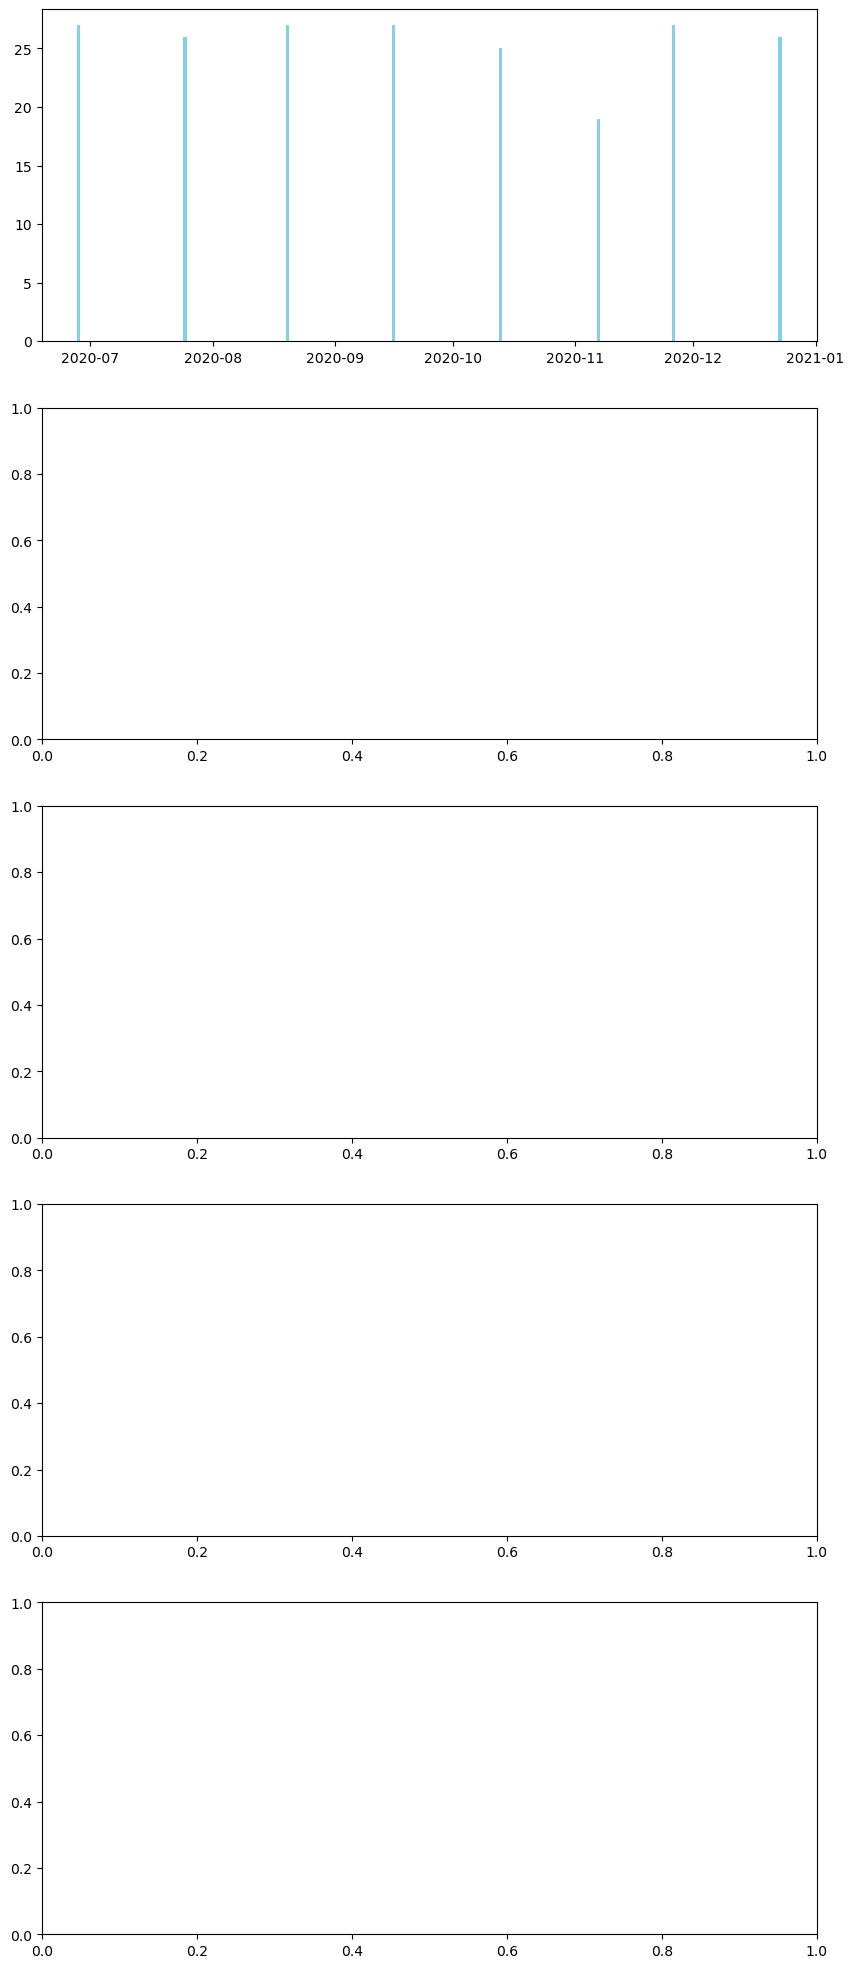

In [115]:
# Get unique years to plot
years = mens_df['year'].unique()
years.sort()

# Create a figure with subplots - one subplot per year
fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(10, 5 * len(years)))

# Check if 'axes' is iterable (it won't be if there's only one subplot)
if len(years) == 1:
    axes = [axes]

for i, year in enumerate(years):
    # Select the subset of data for the current year
    subset = mens_df[mens_df['year'] == year]
    
    # Plot actual cycle length as bars
    axes[i].bar(subset['startDate'], subset['actualCycleLength'], color='skyblue', label='Actual Cycle Length')
    
    # Plot average cycle length as a horizontal line
    axes[i].axhline(y=average_per_year[year], color='red', linestyle='--', label=f'Average: {average_per_year[year]:.2f} days')
    
    # Set titles and labels
    axes[i].set_title(f"Cycle Lengths for {year}")
    axes[i].set_xlabel('Start Date')
    axes[i].set_ylabel('Cycle Length (days)')
    
    # Rotate date labels for clarity
    plt.setp(axes[i].get_xticklabels(), rotation=45)
    
    # Enable legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## GARMIN RUNNING HEATMAP (outcommented)

<!-- import requests

my_client_id = "18a3b276-54d8-4f8b-a5fd-d0090b04a810"
my_client_secret = "MEHn2fe22ZIyJbSujpSztjK25xP5B0VYeec"

# Assuming Garmin has a straightforward OAuth2 flow (check documentation for exact steps)
def get_access_token(client_id, client_secret):
    #auth_url = 'https://connectapi.garmin.com/oauth2/token'
    auth_url = 'https://seminmis.dk'
    response = requests.post(auth_url, data={
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret,
    })
    response_data = response.json()
    return response_data['access_token']

def fetch_activities(access_token):
    activities_url = 'https://connectapi.garmin.com/activities'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(activities_url, headers=headers)
    activities = response.json()
    return activities  # This will be a list or dict depending on API

def download_gpx(activity_id, access_token):
    gpx_url = f'https://connectapi.garmin.com/activities/{activity_id}/gpx'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(gpx_url, headers=headers)
    gpx_data = response.content  # GPX data as bytes
    with open(f'{activity_id}.gpx', 'wb') as f:
        f.write(gpx_data)

# Replace 'your_client_id' and 'your_client_secret' with your actual Garmin API credentials
access_token = get_access_token(my_client_id, my_client_secret)
activities = fetch_activities(access_token)

for activity in activities:  # You may need to adjust depending on the structure of activities
    activity_id = activity['id']  # Assuming 'id' is part of the activity structure
    download_gpx(activity_id, access_token)
-->


## CATS AND THE CITY

In [273]:
import os
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
import pandas as pd

def get_decimal_from_dms(dms, ref):
    degrees = dms[0]
    minutes = dms[1] / 60.0
    seconds = dms[2] / 3600.0

    if ref in ['S', 'W']:
        degrees = -degrees
        minutes = -minutes
        seconds = -seconds

    return degrees + minutes + seconds

def extract_gps_info(image_path):
    try:
        image = Image.open(image_path)
        exif_data = {TAGS[key]: value for key, value in image._getexif().items() if key in TAGS and type(value) is not bytes}

        if 'GPSInfo' in exif_data:
            gps_info = {GPSTAGS.get(key, key): value for key, value in exif_data['GPSInfo'].items()}
            lat = get_decimal_from_dms(gps_info['GPSLatitude'], gps_info['GPSLatitudeRef'])
            lon = get_decimal_from_dms(gps_info['GPSLongitude'], gps_info['GPSLongitudeRef'])
            return lat, lon
        else:
            print("HERE")
            return None, None
    except:
        return None, None

def process_folder(folder_path):
    data = {'Filename': [], 'Latitude': [], 'Longitude': [], 'ImagePath': []}
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.heic')):
    #            print(filename)
            lat, lon = extract_gps_info(os.path.join(folder_path, filename))
            if lat is not None and lon is not None:
                data['Filename'].append(filename)
                data['Latitude'].append(lat)
                data['Longitude'].append(lon)
                # Assuming thumbnails are stored in a parallel structure or with a naming convention
                data['ImagePath'].append(filename)
            else:
                 print("No GPS data found")
    return pd.DataFrame(data)

# Specify your folder path here
folder_path = '../files/catimg/'
df = process_folder(folder_path)

# To save the DataFrame to a CSV file
df.to_csv('geodata.csv', index=False)

df


Filename   Latitude  Longitude      ImagePath
0    IMG_2399.jpeg  55.703536  12.521419  IMG_2399.jpeg
1    IMG_3731.jpeg  55.717647  12.495931  IMG_3731.jpeg
2    IMG_3789.jpeg  55.648728  12.604731  IMG_3789.jpeg
3    IMG_3459.jpeg  55.623853  12.573617  IMG_3459.jpeg
4    IMG_1608.jpeg  55.135456  15.140861  IMG_1608.jpeg
..             ...        ...        ...            ...
100  IMG_7073.jpeg  55.740422  12.459467  IMG_7073.jpeg
101  IMG_3175.jpeg  55.730072  12.523000  IMG_3175.jpeg
102  IMG_2461.jpeg  55.702775  12.523586  IMG_2461.jpeg
103  IMG_7049.jpeg  55.713903  12.488917  IMG_7049.jpeg
104  IMG_0558.jpeg  55.792183  12.492497  IMG_0558.jpeg

[105 rows x 4 columns]

In [8]:
import folium

# Assuming 'df' is your DataFrame with the latitude and longitude

# Create a map centered around the average location in your DataFrame
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each image location
for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Filename: {row['Filename']}").add_to(m)

# Display the map in Jupyter Notebook
m


In [274]:
import folium
from folium import IFrame

# Your modified DataFrame now includes 'ImagePath'

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

for idx, row in df.iterrows():
    # Adjust image path as necessary to point to the correct location; might need adjustments if using a notebook
    image_path =  row['ImagePath']
    iframe = IFrame(f'<img src="{folder_path}{image_path}" width="150" height="100">', width=200, height=150)
    popup = folium.Popup(iframe, max_width=300)
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup).add_to(m)

m
